In [2]:
import matplotlib.pyplot as plt
import numpy as np

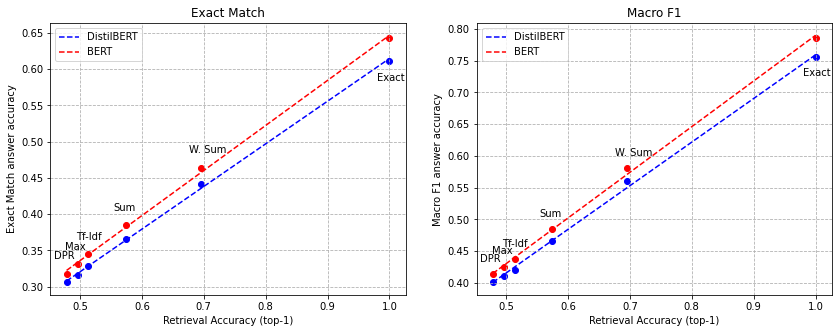

In [13]:
labels = ["Exact", "Tf-Idf", "DPR", "Sum", "Max", "W. Sum"]
retr_acc = np.array([100, 51.37, 47.84, 57.39, 49.65, 69.57])/100
xx = np.sort(retr_acc)

exact_match_DB = np.array([61.17, 32.79, 30.58, 36.52, 31.60, 44.21])/100
macro_f1_DB = np.array([75.53, 42.09, 40.15, 46.59, 41.11, 55.97])/100

exact_match_B = np.array([64.33, 34.48, 31.81, 38.44, 33.13, 46.41])/100
macro_f1_B = np.array([78.59, 43.71, 41.40, 48.43, 42.52, 58.03])/100

fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.grid(linestyle='--')
ax2.grid(linestyle='--')

fig.set_size_inches(14, 5)
ax1.scatter(retr_acc, exact_match_DB, c="b")
ax1.scatter(retr_acc, exact_match_B, c="r")
aDB, bDB = np.polyfit(retr_acc, exact_match_DB, 1)
aB, bB = np.polyfit(retr_acc, exact_match_B, 1)
ax1.plot(xx, aDB*xx+bDB, "--b")
ax1.plot(xx, aB*xx+bB, "--r")

ax2.scatter(retr_acc, macro_f1_DB, c="b")
ax2.scatter(retr_acc, macro_f1_B, c="r")

aDB, bDB = np.polyfit(retr_acc, macro_f1_DB, 1)
aB, bB = np.polyfit(retr_acc, macro_f1_B, 1)
ax2.plot(xx, aDB*xx+bDB, "--b")
ax2.plot(xx, aB*xx+bB, "--r")

for txt, x, y in zip(labels, retr_acc, exact_match_B):
    ax1.annotate(txt, (x-0.02, y+(0.02 if not txt == 'Exact' else -0.06)))

for txt, x, y in zip(labels, retr_acc, macro_f1_B):
    ax2.annotate(txt, (x-0.02, y+(0.02 if not txt == 'Exact' else -0.06)))

ax1.set_title("Exact Match")
ax1.legend(["DistilBERT", "BERT"])
ax1.set_ylabel("Exact Match answer accuracy")
ax1.set_xlabel("Retrieval Accuracy (top-1)")

ax2.set_ylabel("Macro F1 answer accuracy")
ax2.set_xlabel("Retrieval Accuracy (top-1)")
ax2.set_title("Macro F1")
ax2.legend(["DistilBERT", "BERT"])